
# Level 2 : task 1 

# Table Booking and Online Delivery



Determine the percentage of restaurants that
offer table booking and online delivery.

Compare the average ratings of restaurants
with table booking and those without.

Analyze the availability of online delivery
among restaurants with different price ranges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\asmas\Downloads\Dataset  (3).csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Percentage of Table Booking and Online Delivery 

In [3]:

# Convert relevant columns to numeric
data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Calculate percentages
total_restaurants = len(data)
table_booking_percentage = (data['Has Table booking'].sum() / total_restaurants) * 100
online_delivery_percentage = (data['Has Online delivery'].sum() / total_restaurants) * 100

print(f"Percentage of restaurants that offer table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%


In [4]:

print(data['Has Table booking'].unique())


[1 0]


### Restaurants with and without Table Booking

In [5]:
# Clean the 'Has Table booking' column
data['Has Table booking'] = data['Has Table booking'].replace({'Yes': 1, 'No': 0})

# Calculate average ratings for restaurants with and without table booking
avg_rating_with_table_booking = data[data['Has Table booking'] == 1]['Aggregate rating'].mean()
avg_rating_without_table_booking = data[data['Has Table booking'] == 0]['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating of restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


### availability of online delivery among restaurants with different price ranges

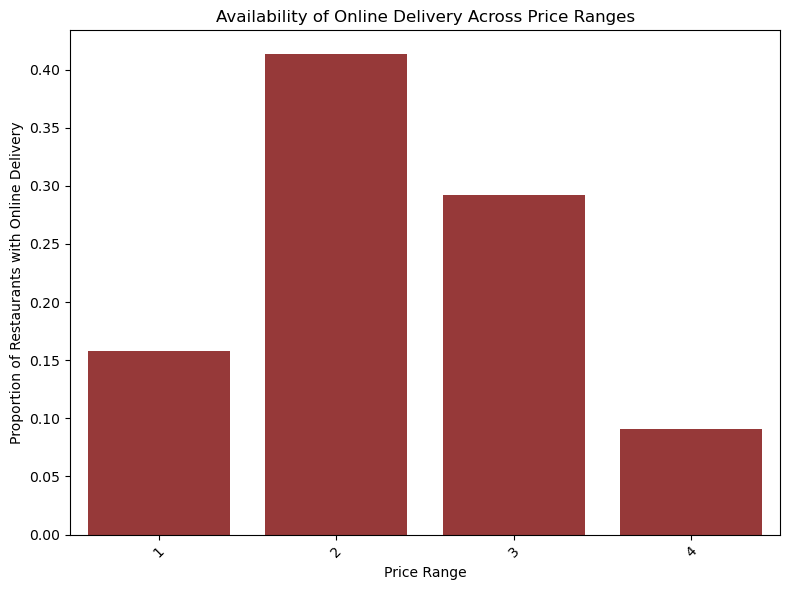

In [6]:
# Group the data by 'Price range' and calculate the proportion of restaurants offering online delivery
online_delivery_proportion = data.groupby('Price range')['Has Online delivery'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=online_delivery_proportion.index, y=online_delivery_proportion.values, color='brown')
plt.title('Availability of Online Delivery Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Proportion of Restaurants with Online Delivery')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Level 2 : task 2 

# Price Range Analysis

Determine the most common price range
among all the restaurants.

Calculate the average rating for each price
range.

Identify the color that represents the highest
average rating among different price ranges.


In [7]:
# Determine the most common price range
most_common_price_range = data['Price range'].mode()[0]

print("The most common price range among all the restaurants is:", most_common_price_range)


The most common price range among all the restaurants is: 1


In [8]:
# Calculate the average rating for each price range
average_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()

print("Average rating for each price range:")
print(average_rating_by_price_range)
 

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


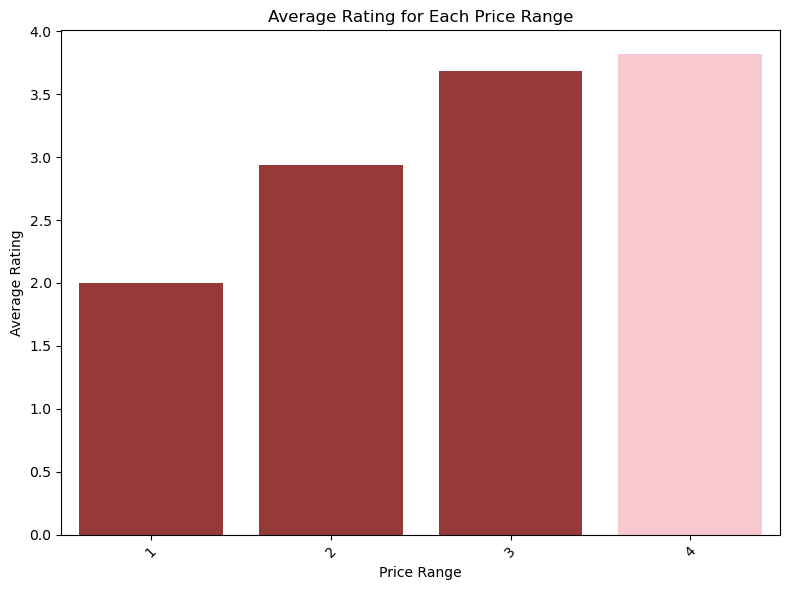

In [9]:
# Calculate the average rating for each price range
average_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()

# Find the price range with the highest average rating
highest_rating_price_range = average_rating_by_price_range.idxmax()

# Define colors for each price range, setting the color of the highest average rating to 'red'
colors = ['brown' if price_range != highest_rating_price_range else 'pink' for price_range in average_rating_by_price_range.index]

# Plot the average rating for each price range with colors
plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating_by_price_range.index, y=average_rating_by_price_range.values, palette=colors)
plt.title('Average Rating for Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Level 2  : task 3 

# Feature Engineering

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [10]:
# Extracting the length of the restaurant name and address
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [11]:
# Encode "Has Table Booking" as binary (1 for Yes, 0 for No)
data['Has Table Booking'] = (data['Has Table booking'] == 'Yes').astype(int)

# Encode "Has Online Delivery" as binary (1 for Yes, 0 for No)
data['Has Online Delivery'] = (data['Has Online delivery'] == 'Yes').astype(int)

data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,0,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,0,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,0,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,0,0
